In [1]:
import math
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LinearRegression
import sklearn
import statsmodels.api as sm
import scipy.stats as st
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

## You can choose which data they want to interact with!
### The respective csv file will be uploaded.
### Note: Make sure you have run Data_Rent.ipynb and Data_Buy.ipynb before running this analysis

In [2]:
choose_data = widgets.ToggleButtons(
    description='Choose:',
    options=['Rent', 'Buy'],
)
choose_data

ToggleButtons(description='Choose:', options=('Rent', 'Buy'), value='Rent')

In [3]:
if choose_data.value == 'Rent':
    data = pd.read_csv("Renting_data.csv")    
else:
    data = pd.read_csv("Buying_data.csv")
data.head()

,Place,Price,Bedroom,Bathroom,Saleable Area,Area,Region
0,10 SHOUSON HILL ROAD EAST 壽臣山道東 10 號,1000000.0,7.0,6.0,1030.11,Southern District/Repulse Bay,Hong Kong Island
1,7-15 Mount Kellett Road 加列山道7號,930000.0,11.0,12.0,1022.12,Peak/South,Hong Kong Island
2,7-15 Mount Kellett Road 加列山道7號,520000.0,6.0,7.0,529.55,Peak/South,Hong Kong Island
3,Tavistock 騰皇居,500000.0,4.0,3.0,488.11,Mid Level Central,Hong Kong Island
4,The Lily 淺水灣道129號,400000.0,5.0,3.0,491.74,Peak/South,Hong Kong Island


## Distribution of Prices based on the different Regions in Hong Kong

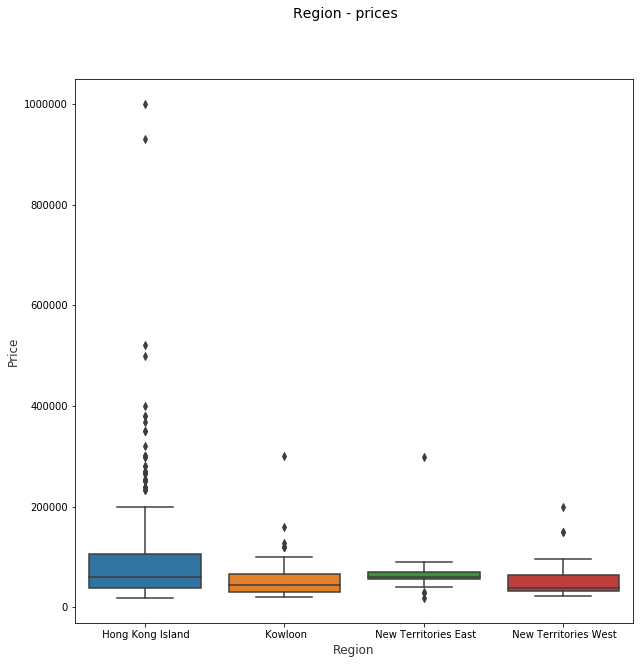

In [4]:
f, (ax) = plt.subplots(1, 1, figsize=(10, 10)) 
f.suptitle('Region - prices', fontsize=14)
sns.boxplot(x="Region", y="Price", data=data, ax=ax) 
ax.set_xlabel("Region", size = 12, alpha=0.8) 
if choose_data.value == "Rent":
    ax.set_ylabel("Price", size = 12, alpha=0.8)
else:
    ax.set_ylabel("Price (in hundreds of millions)", size = 12, alpha=0.8)

### As can be seen, it can already be inferred that the median prices in various regions are very different; while Hong Kong Island and New Territories East prices are high, Kowloon and New Territories West come across as the more economical options
## To delve further in each region, choose a particular region and run the following code to see a visual representation of what areas have more houses available

In [5]:
reg = widgets.ToggleButtons(
    description='Choose:',
    options=[' Hong Kong Island', ' New Territories West', ' Kowloon', ' New Territories East'],
)
print("Select a Region")
reg

Select a Region


ToggleButtons(description='Choose:', options=(' Hong Kong Island', ' New Territories West', ' Kowloon', ' New …

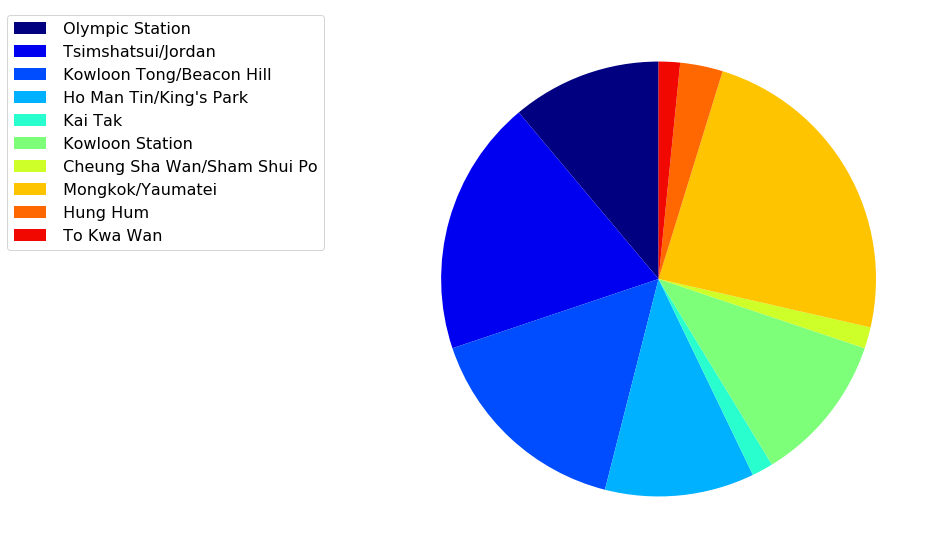

In [6]:
# pie charts
from matplotlib import cm
all = pd.DataFrame(data.loc[data['Region'] == reg.value]["Area"])
all['freq'] = all.groupby('Area')['Area'].transform('count')
all = all.drop_duplicates(subset='Area')

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10) 
theme = plt.get_cmap('jet')
ax.set_prop_cycle("color", [theme(1. * i / len(all["Area"]))
                             for i in range(len(all["Area"]))])
labels = np.array(all['Area'])
ax.pie(all['freq'], startangle = 90)
# ax.legend(labels= all['Area'])
plt.legend(labels = all['Area'], loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=16)
plt.show()

## To compare the average plot size available in each area

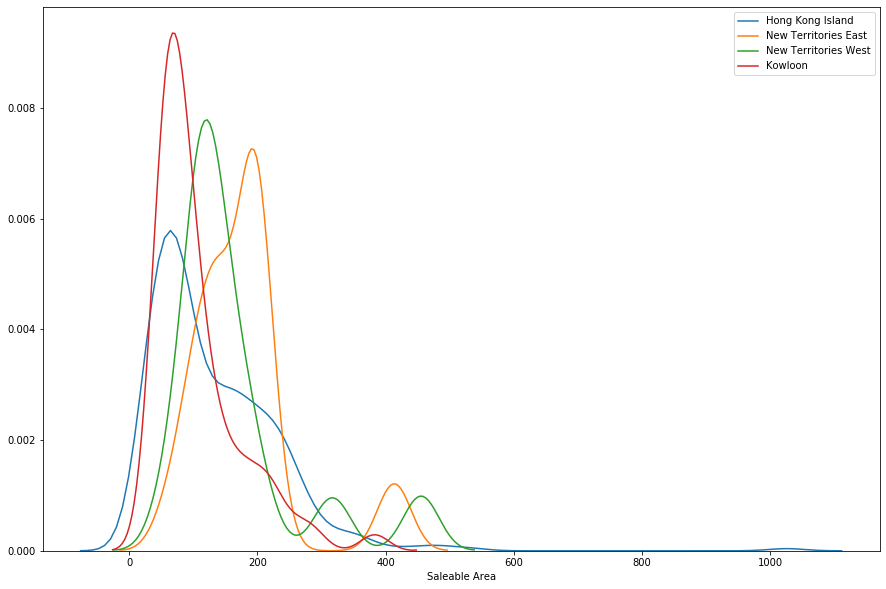

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data.loc[data['Region'] == " Hong Kong Island"]['Saleable Area'], hist = False, bins = 50, label = 'Hong Kong Island')
sns.distplot(data.loc[data['Region'] == " New Territories East"]['Saleable Area'], hist = False, bins = 50, label = 'New Territories East')
sns.distplot(data.loc[data['Region'] == " New Territories West"]['Saleable Area'], hist = False, bins = 50, label = 'New Territories West')
sns.distplot(data.loc[data['Region'] == " Kowloon"]['Saleable Area'], hist = False, bins = 50, label = 'Kowloon')

### The highest peak in each graph gives us the most frequently seen plot size in that region.
## To understand our data better as a whole, here is an interactive visual mapping the relationship between Price and the saleable area
### The scroll bar can be moved to set the upper limit for the graph. In the same way, you can also directly type in the upper limit by clicking on the value beside the scroll

In [9]:
def areavspr(Upper_Limit):
    plt.scatter(x=data.loc[data['Saleable Area'] <= Upper_Limit]["Saleable Area"], y=data.loc[data['Saleable Area'] <= Upper_Limit]['Price'])  

interact(areavspr, Upper_Limit=(data["Saleable Area"].min(), data["Saleable Area"].max()))

interactive(children=(FloatSlider(value=517.84, description='Upper_Limit', max=1030.11, min=5.57), Output()), …

<function __main__.areavspr(Upper_Limit)>

## Multiple Linear Regression on the different factors that might affect the Price of a listing
### The factors being regressed are number of bedrooms (x1), number of bathrooms (x2) and the plot size (x3)

In [10]:
data_nona = data.dropna()
newdata = pd.DataFrame(data_nona, columns = ['Price', 'Bedroom', "Bathroom", "Saleable Area"])

X = sm.add_constant(np.array(newdata.drop('Price', axis = 1)))
y = newdata['Price']
lm2 = sm.OLS(y,X).fit()
# Show results
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          9.20e-275
Time:                        21:15:43   Log-Likelihood:                -9568.2
No. Observations:                 806   AIC:                         1.914e+04
Df Residuals:                     802   BIC:                         1.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2255.9239   3499.127     -0.645      0.5

### In the OLS Regression, a factor is deemed to be a big factor if the P value is very low and the t-statistic value is very high. As can be observed, the biggest factor in determining prices is the plot size (x3), followed by the number of bedrooms (x1). The number of bathrooms(x2) is the factor least affecting our results.
### A residual is the difference between the actual value and the predicted value. When working on improving a regression, a Residual vs Fitted values graph and it's shape can be useful in analysing the goodness of fit of a model.
## Residual vs Fitted values graph


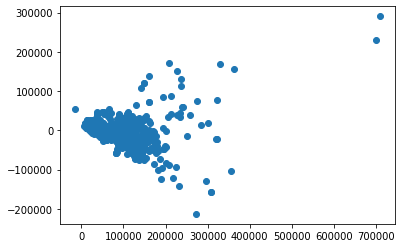

In [11]:
residual = lm2.resid
fitted = lm2.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

### As the result is bulging outwards as the price increases, this shows that the variance of our data increases as price increases too. This is not good for a model as the variance should remain linear in an ideal situation
### Another way to check the qualiy of regression is by plotting a Q-Q plot which measures the residuals with the theoretical quantiles. 
## Q-Q Plot

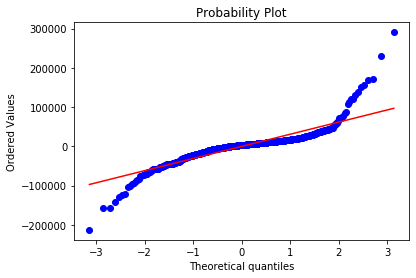

In [12]:
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

### The points are fairly close to the normal curve (in red) around the median however, skew away at the extreme ends. This shape of the graph tells us that the residuals from the OLS approach follow a Student's t distribution.
## Removing outliers 
### The z-score of each value tells us how far away a point is from its mean value. To remove outliers, it is vital to set a threshold of the number of standard deviations away you are willing to spread your data, in other words, only use data in a particular confidence interval.

In [13]:
from scipy import stats
import numpy as np
data_nona = data.dropna()
newdata = pd.DataFrame(data_nona, columns = ['Price', 'Bedroom', "Bathroom", "Saleable Area"])
z = np.abs(stats.zscore(newdata))
print(z)

[[12.0453166   3.76531048  3.63420236  9.09664368]
 [11.12826761  7.38575814  9.17312534  9.01546655]
 [ 5.75698069  2.86019857  4.55735619  4.0110333 ]
 ...
 [ 0.80646991  1.665361    0.98156679  1.10200866]
 [ 0.81957061  0.14486283  0.05841296  0.75555806]
 [ 0.81957061  0.76024909  0.98156679  1.05852454]]


In [14]:
# regression

x = np.array(newdata[(z < 3).all(axis=1)]['Saleable Area']).reshape((-1, 1)) # reshape x for regression
y = np.array(newdata[(z < 3).all(axis=1)]['Price'])
model = LinearRegression().fit(x, y)
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7310606701086275
intercept: 3098.5106440748204
slope: [556.0480329]


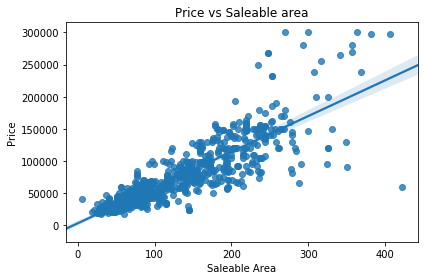

In [15]:
#data.plot(x='Saleable Area', y='Price', style='o')  
#plt.plot(x, model.predict(x), color='red',linewidth=3)
sns.regplot(x='Saleable Area', y='Price', data=newdata[(z < 3).all(axis=1)])
plt.title('Price vs Saleable area')  
plt.xlabel('Saleable Area')  
plt.ylabel('Price')  
plt.tight_layout()
plt.show()
# The shaded region is the 95 percent confidence interval for this regression

### The light blue region around the best fit line gives us its range of error. This range increases when the threshold is kept below 3, minimum at 3 and increases again when kept above 3.
## Based on our trials, keeping the threshold as 3 standard deviations gives us the smallest error range for the Best Fit Line and is hence, the most optimal relationship found between Price and Saleable Area.